Interpolated value at x = 12.5: y = 16.2783203125


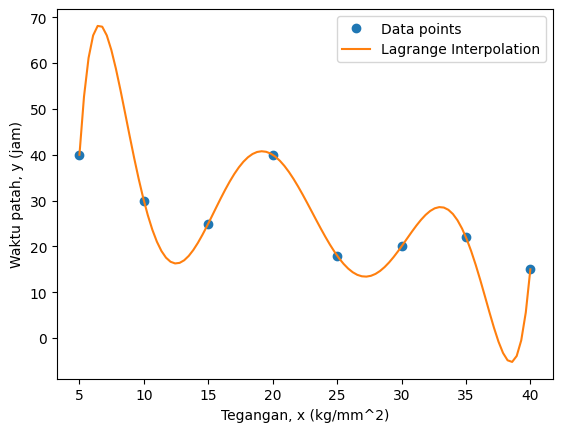

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Data points
x = np.array([5, 10, 15, 20, 25, 30, 35, 40])
y = np.array([40, 30, 25, 40, 18, 20, 22, 15])

def lagrange_interpolation(x_points, y_points, x):
    total = 0
    n = len(x_points)
    for i in range(n):
        xi, yi = x_points[i], y_points[i]

        # Calculate the Lagrange basis polynomial
        term = yi
        for j in range(n):
            if j != i:
                term = term * (x - x_points[j]) / (xi - x_points[j])

        # Add the term to the total
        total += term

    return total

# Define the interpolation function for use
def interpolate_values(x_points, y_points, x_vals):
    return [lagrange_interpolation(x_points, y_points, x) for x in x_vals]

# Example of interpolating a value
x_interpolate = 12.5
y_interpolate = lagrange_interpolation(x, y, x_interpolate)
print(f"Interpolated value at x = {x_interpolate}: y = {y_interpolate}")

# Visualize the interpolation
x_values = np.linspace(min(x), max(x), 100)
y_values = interpolate_values(x, y, x_values)

plt.plot(x, y, 'o', label='Data points')
plt.plot(x_values, y_values, label='Lagrange Interpolation')
plt.xlabel('Tegangan, x (kg/mm^2)')
plt.ylabel('Waktu patah, y (jam)')
plt.legend()
plt.show()


Interpolated value at x = 12.5: y = 16.2783203125


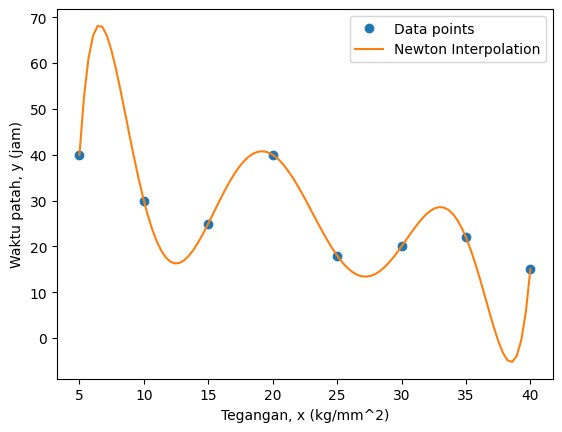

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Data points
x = np.array([5, 10, 15, 20, 25, 30, 35, 40])
y = np.array([40, 30, 25, 40, 18, 20, 22, 15])

def divided_diff_table(x, y):
    n = len(y)
    coef = np.zeros([n, n])
    # the first column is y
    coef[:,0] = y

    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j] - x[i])

    return coef

def newton_interpolation(x_data, y_data, x):
    coef = divided_diff_table(x_data, y_data)
    n = len(x_data)
    polynomial = coef[0,0]
    product_term = 1.0

    for i in range(1, n):
        product_term *= (x - x_data[i-1])
        polynomial += coef[0, i] * product_term

    return polynomial

# Define the interpolation function for use
def interpolate_values(x_data, y_data, x_vals):
    return [newton_interpolation(x_data, y_data, x) for x in x_vals]

# Example of interpolating a value
x_interpolate = 12.5
y_interpolate = newton_interpolation(x, y, x_interpolate)
print(f"Interpolated value at x = {x_interpolate}: y = {y_interpolate}")

# Visualize the interpolation
x_values = np.linspace(min(x), max(x), 100)
y_values = interpolate_values(x, y, x_values)

plt.plot(x, y, 'o', label='Data points')
plt.plot(x_values, y_values, label='Newton Interpolation')
plt.xlabel('Tegangan, x (kg/mm^2)')
plt.ylabel('Waktu patah, y (jam)')
plt.legend()
plt.show()
